In [1]:
print("hello world")

hello world


In [2]:
for i in range(10):
  print(i*2)

0
2
4
6
8
10
12
14
16
18


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df =pd.read_csv("/content/drive/MyDrive/Reinforcement Learning/DATA/fake_reg.csv")

In [5]:
df.head()

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

In [6]:
len(df)

1000

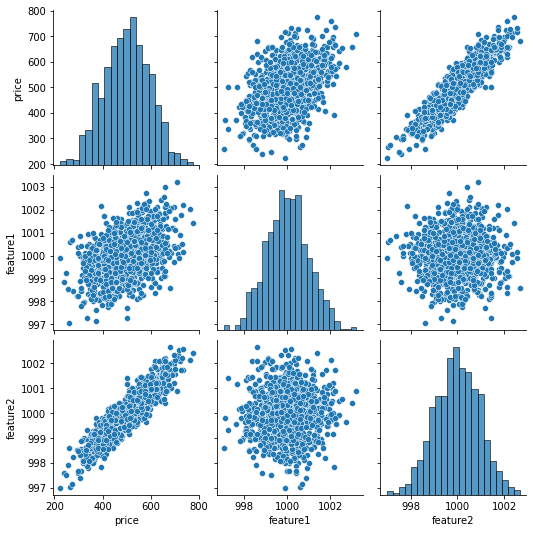

In [7]:
sns.pairplot(df)

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
X= df[["feature1","feature2"]].values

In [10]:
y=df["price"].values

In [11]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
len(X_train),len(X_test),len(y_train),len(y_test)

(700, 300, 700, 300)

In [14]:
X_train.shape

(700, 2)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler =MinMaxScaler()


In [17]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
X_train=scaler.transform(X_train)

In [19]:
X_test=scaler.transform(X_test)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [21]:
# model =Sequential([
#                    Dense(4,activation="relu"),
#                    Dense(2,activation="relu"),
#                    Dense(1)
# ])




In [22]:
model =Sequential()

model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop",
              loss="mse")

In [23]:
model.fit(X_train,
          y_train,
          epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256678.8125
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256592.1875
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256506.2188
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256412.0469
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256309.2969
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 256196.9844
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 256074.5625
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255940.2344
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 255794.6562
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 255635.5469
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 255463.1250
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


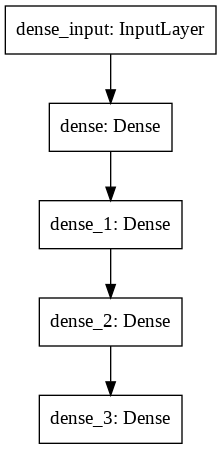

In [25]:
import tensorflow as tf

#plot the loss curve
tf.keras.utils.plot_model(model)

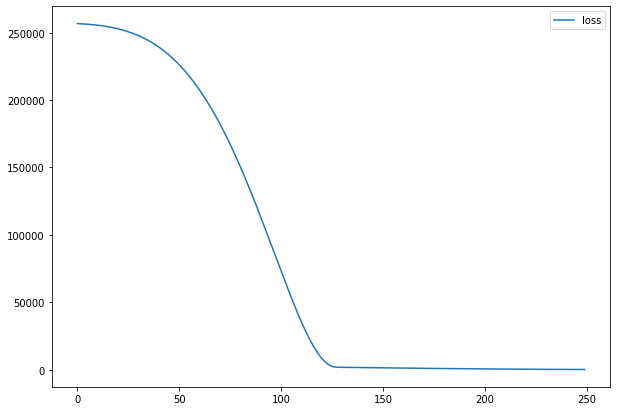

In [26]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(10,7))

In [27]:
original_results=model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 78.9052


In [28]:
test_predictions=model.predict(X_test)
test_predictions[:5]

array([[413.39395],
       [614.43024],
       [585.0051 ],
       [568.29285],
       [379.93054]], dtype=float32)

In [29]:
test_predictions=pd.Series(test_predictions.reshape(300,))
test_predictions

0      413.393951
1      614.430237
2      585.005127
3      568.292847
4      379.930542
          ...    
295    528.352234
296    518.266541
297    601.392822
298    423.124146
299    419.366425
Length: 300, dtype: float32

In [30]:
pred_df=pd.DataFrame(y_test,columns=["Test True Y"])
pred_df=pd.concat([pred_df,test_predictions],axis=1)

In [31]:
pred_df.columns=["Test True Y","Model Predictions"]
pred_df

Test True Y  Model Predictions
0     402.296319         413.393951
1     624.156198         614.430237
2     582.455066         585.005127
3     578.588606         568.292847
4     371.224104         379.930542
..           ...                ...
295   525.704657         528.352234
296   502.909473         518.266541
297   612.727910         601.392822
298   417.569725         423.124146
299   410.538250         419.366425

[300 rows x 2 columns]

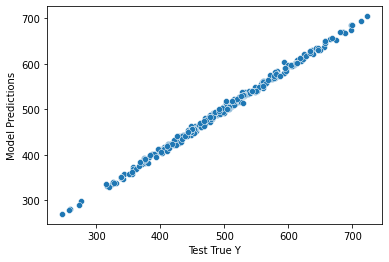

In [32]:
sns.scatterplot(x="Test True Y",y="Model Predictions",data=pred_df)

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [34]:
mean_absolute_error(pred_df["Test True Y"],pred_df["Model Predictions"])

7.268658072011047

In [35]:
df.describe()

price     feature1     feature2
count  1000.000000  1000.000000  1000.000000
mean    498.673029  1000.014171   999.979847
std      93.785431     0.974018     0.948330
min     223.346793   997.058347   996.995651
25%     433.025732   999.332068   999.316106
50%     502.382117  1000.009915  1000.002243
75%     564.921588  1000.637580  1000.645380
max     774.407854  1003.207934  1002.666308

In [36]:
mean_squared_error(pred_df["Test True Y"],pred_df["Model Predictions"])

78.90523678625996

In [37]:
squre_root_error=tf.sqrt(mean_squared_error(pred_df["Test True Y"],pred_df["Model Predictions"])).numpy()
squre_root_error

8.88286197046087

In [38]:
from tensorflow.keras.models import load_model
model.save("my_gem_model.h5")

In [39]:
load_model=load_model("/content/my_gem_model.h5")

In [40]:
load_model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 78.9052


78.90522766113281

In [41]:
original_results

78.90522766113281

In [42]:
import matplotlib.pyplot as plt


In [43]:
df=pd.read_csv("/content/drive/MyDrive/Reinforcement Learning/DATA/kc_house_data.csv")

In [44]:
df.head()

id        date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  10/13/2014  221900.0  ... -122.257           1340        5650
1  6414100192   12/9/2014  538000.0  ... -122.319           1690        7639
2  5631500400   2/25/2015  180000.0  ... -122.233           2720        8062
3  2487200875   12/9/2014  604000.0  ... -122.393           1360        5000
4  1954400510   2/18/2015  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]

In [45]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Figure size 720x504 with 0 Axes>

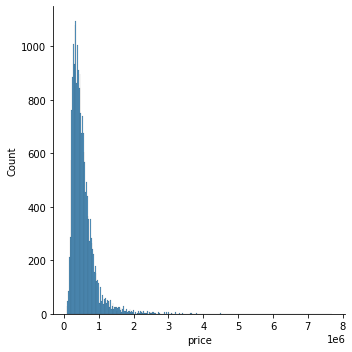

In [46]:
plt.figure(figsize=(10,7))
sns.displot(df["price"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


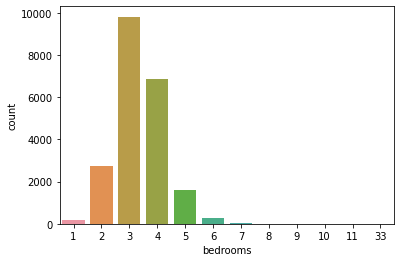

In [47]:
sns.countplot(df["bedrooms"])


In [48]:
df.corr()["price"].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

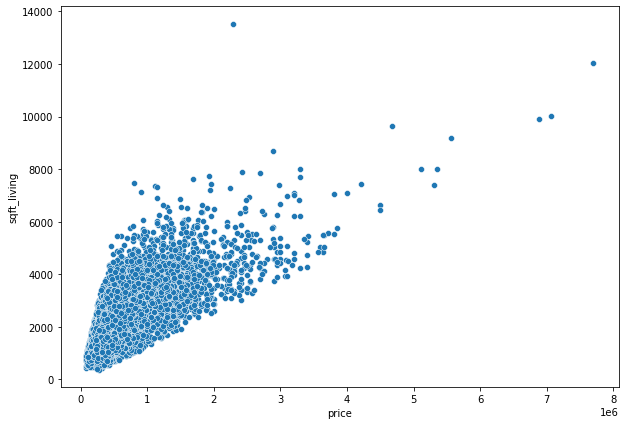

In [49]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="price",y="sqft_living",data=df)

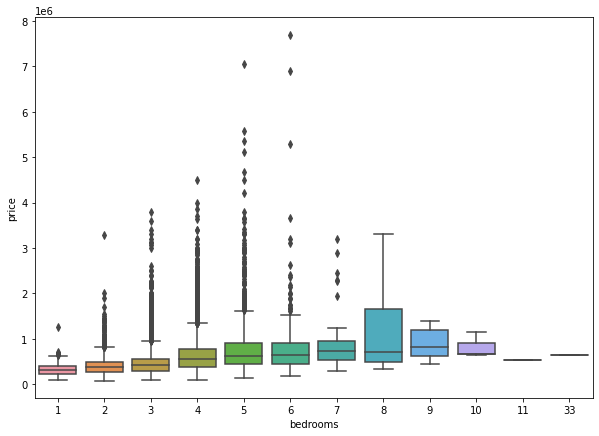

In [50]:
plt.figure(figsize=(10,7))

sns.boxplot(x="bedrooms",y="price",data=df)

In [51]:
pip install https://github.com/matplotlib/basemap/archive/master.zip


  Using cached https://github.com/matplotlib/basemap/archive/master.zip


In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


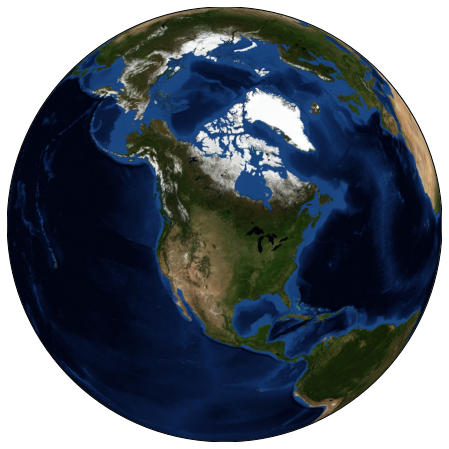

In [53]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

In [56]:
pip install geopandas

     |████████████████████████████████| 994 kB 9.2 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 


In [57]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [61]:
df["long"]

0       -122.257
1       -122.319
2       -122.233
3       -122.393
4       -122.045
          ...   
21592   -122.346
21593   -122.362
21594   -122.299
21595   -122.069
21596   -122.299
Name: long, Length: 21597, dtype: float64

In [62]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df["lat"],df["long"] ))

In [63]:
print(gdf.head())

           id        date  ...  sqft_lot15                 geometry
0  7129300520  10/13/2014  ...        5650  POINT (47.511 -122.257)
1  6414100192   12/9/2014  ...        7639  POINT (47.721 -122.319)
2  5631500400   2/25/2015  ...        8062  POINT (47.738 -122.233)
3  2487200875   12/9/2014  ...        5000  POINT (47.521 -122.393)
4  1954400510   2/18/2015  ...        7503  POINT (47.617 -122.045)

[5 rows x 22 columns]


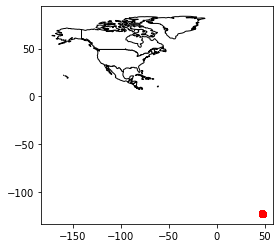

In [71]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent=='North America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

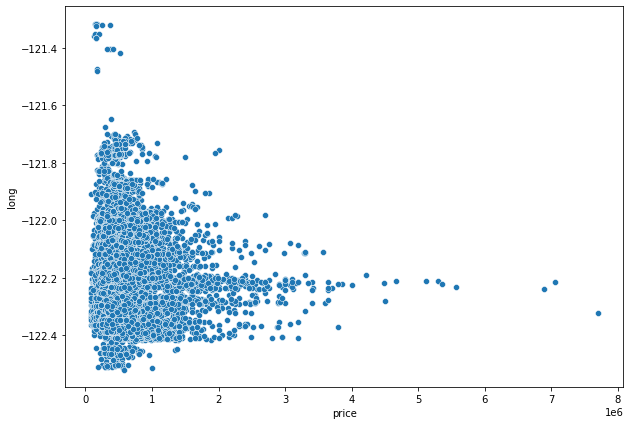

In [73]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="price",y="long",data=df)

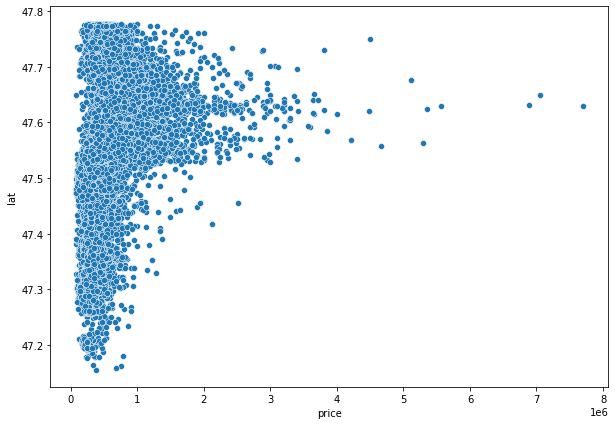

In [74]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="price",y="lat",data=df)

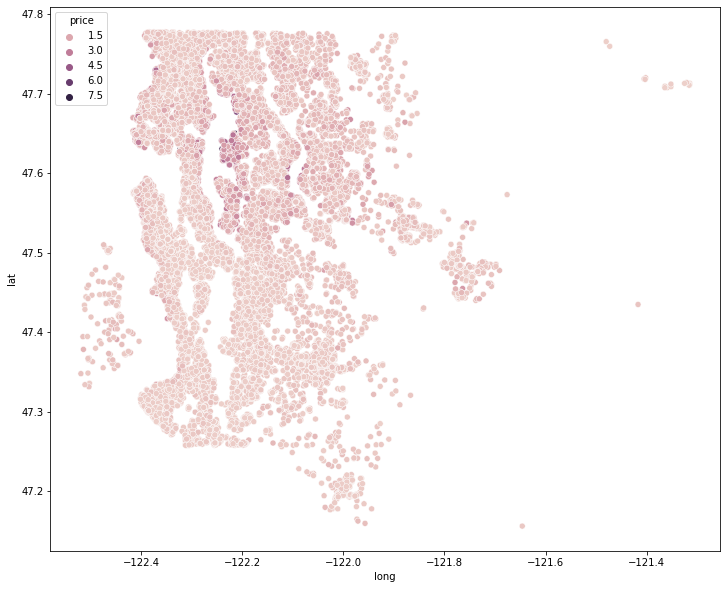

In [76]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="long",y="lat",data=df,hue="price")

In [81]:
df.sort_values("price",ascending=False).head(10)

id        date  ...  sqft_lot15                 geometry
7245  6762700020  10/13/2014  ...        8800  POINT (47.630 -122.323)
3910  9808700762   6/11/2014  ...       25449  POINT (47.650 -122.214)
9245  9208900037   9/19/2014  ...       42730  POINT (47.630 -122.240)
4407  2470100110    8/4/2014  ...       24345  POINT (47.629 -122.233)
1446  8907500070   4/13/2015  ...       21750  POINT (47.623 -122.220)
1313  7558700030   4/13/2015  ...       24619  POINT (47.563 -122.210)
1162  1247600105  10/20/2014  ...       26788  POINT (47.677 -122.211)
8085  1924059029   6/17/2014  ...       10454  POINT (47.557 -122.210)
2624  7738500731   8/15/2014  ...       23408  POINT (47.749 -122.280)
8629  3835500195   6/18/2014  ...       14592  POINT (47.621 -122.219)

[10 rows x 22 columns]

In [82]:
len(df)

21597

In [84]:
non_top1_precent=df.sort_values("price",ascending=False).iloc[216:]

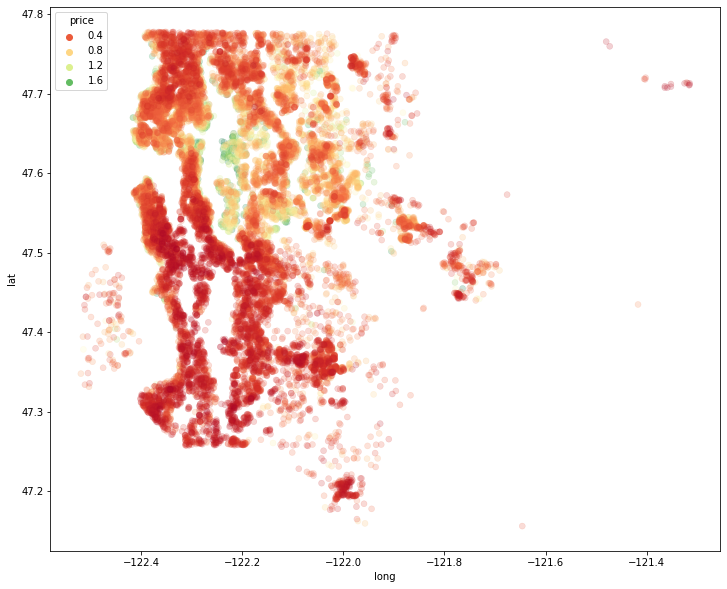

In [87]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="long",y="lat",data=non_top1_precent,
                hue="price",
                edgecolor=None,
                alpha=0.2,
                palette="RdYlGn")

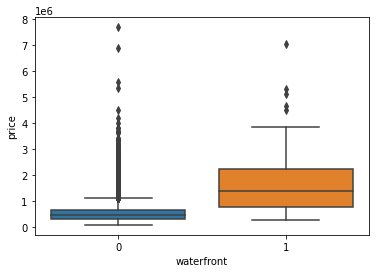

In [88]:
sns.boxplot(x="waterfront",y="price",data=df)